# Classification of blood cells as white or red: Part 1

## 1. Data Exploration

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Display output of all code lines in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# to reproduce results
seed = 220
rng = np.random.RandomState(seed)

In [4]:
import os
if os.path.exists('/content/imageProcessing') == False:
  !git clone https://github.com/amrik220/imageProcessing

In [5]:
# load data labels from the csv file
data = pd.read_csv('/content/imageProcessing/blood_cell_detection/blood_cell_detection.csv')

data.head()
data.shape

,filename,cell_type,xmin,xmax,ymin,ymax
0,0.jpg,RBC,5,90,249,354
1,0.jpg,RBC,210,323,8,118
2,0.jpg,RBC,158,256,283,394
3,0.jpg,RBC,83,166,399,480
4,0.jpg,RBC,534,635,13,116


(4888, 6)

In [6]:
data.filename.unique().shape

(364,)

In [7]:
data.cell_type.unique()

array(['RBC', 'WBC', 'Platelets'], dtype=object)

In [8]:
data.cell_type.value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

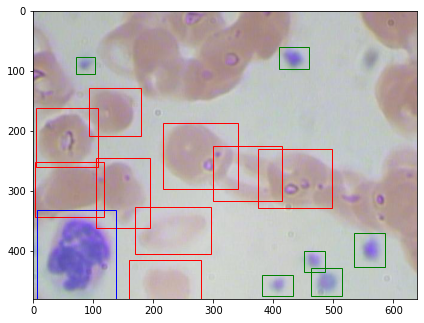

Image is of shape (480, 640, 3)


In [9]:
# take random index
idx = rng.choice(range(data.shape[0])) 

# get corresponding image
image = plt.imread('/content/imageProcessing/blood_cell_detection/images/' + data.iloc[idx].filename.split('.')[0] + '.jpg')

# draw emtpy figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0, 0, 1, 1])

# plot image
plt.imshow(image)
    
# for each row
for _, row in data[data.filename == data.iloc[idx].filename].iterrows():
    # get actual coordinates
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    # find width and height
    width = xmax - xmin
    height = ymax - ymin
    
    # set different bounding box colors
    if row.cell_type == 'RBC':
        edgecolor = 'r'
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
    
    # create rectangular patch
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor=edgecolor, facecolor='none')
    
    # add patch
    ax.add_patch(rect)

# show figure
plt.show()

# print image shape
print('Image is of shape', image.shape)

## 2. Load and preprocess data

In [10]:
# keep only wbc's
data = data.loc[data.cell_type == 'WBC'].copy()

In [11]:
# drop images having more than one wbc
data = data.drop_duplicates(subset=['filename', 'cell_type'], keep=False)

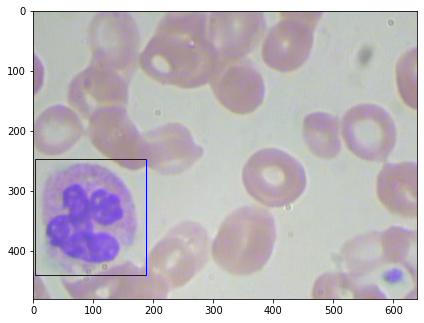

Image is of shape (480, 640, 3)


In [12]:
idx = rng.choice(range(data.shape[0])) 

image = plt.imread('/content/imageProcessing/blood_cell_detection/images/' + data.iloc[idx].filename.split('.')[0] + '.jpg')

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.imshow(image)
    
for _, row in data[data.filename == data.iloc[idx].filename].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    if row.cell_type == 'RBC':
        edgecolor = 'r'
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
    
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)
    
plt.show()
print('Image is of shape', image.shape)

In [13]:
row = data.iloc[idx]
row

filename     232.jpg
cell_type        WBC
xmin               2
xmax             187
ymin             247
ymax             440
Name: 3064, dtype: object

In [14]:
patch_1_xmin, patch_1_ymin, patch_1_xmax, patch_1_ymax = 0, 0, 320, 240
patch_2_xmin, patch_2_ymin, patch_2_xmax, patch_2_ymax = 320, 0, 640, 240
patch_3_xmin, patch_3_ymin, patch_3_xmax, patch_3_ymax = 0, 240, 320, 480
patch_4_xmin, patch_4_ymin, patch_4_xmax, patch_4_ymax = 320, 240, 640, 480
patch_5_xmin, patch_5_ymin, patch_5_xmax, patch_5_ymax = 160, 120, 480, 360


patch_1 = image[patch_1_ymin:patch_1_ymax, patch_1_xmin:patch_1_xmax, :]
patch_2 = image[patch_2_ymin:patch_2_ymax, patch_2_xmin:patch_2_xmax, :]
patch_3 = image[patch_3_ymin:patch_3_ymax, patch_3_xmin:patch_3_xmax, :]
patch_4 = image[patch_4_ymin:patch_4_ymax, patch_4_xmin:patch_4_xmax, :]
patch_5 = image[patch_5_ymin:patch_5_ymax, patch_5_xmin:patch_5_xmax, :]

In [15]:
patch_1.shape, patch_2.shape, patch_3.shape, patch_4.shape, patch_5.shape

((240, 320, 3), (240, 320, 3), (240, 320, 3), (240, 320, 3), (240, 320, 3))

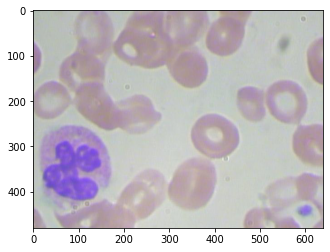

In [16]:
plt.imshow(image)

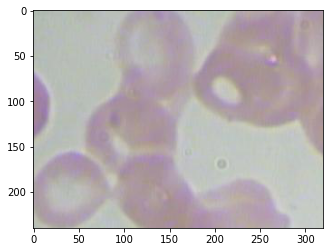

In [17]:
plt.imshow(patch_1) 

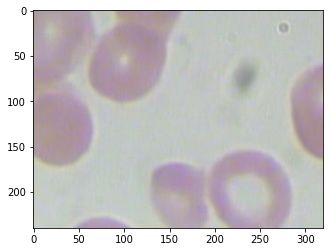

In [18]:
plt.imshow(patch_2)

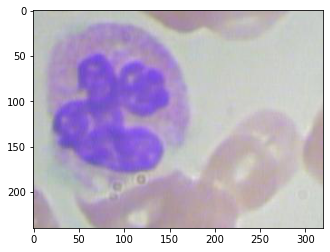

In [19]:
plt.imshow(patch_3)

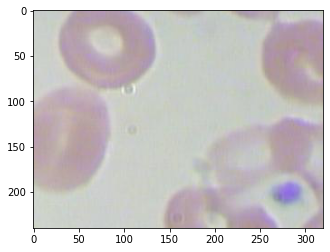

In [20]:
plt.imshow(patch_4)

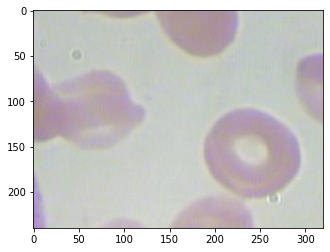

In [21]:
plt.imshow(patch_5)

In [22]:
# for patch_1

Irect_xmin, Irect_ymin = max(row.xmin, patch_1_xmin), max(row.ymin, patch_1_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_1_xmax), min(row.ymax, patch_1_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_1 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_1_xmax - patch_1_xmin)*(patch_1_ymax - patch_1_ymin)
    
    target_1 = Iarea / Parea 
    target_1 = int(target_1 > 0.1)

In [23]:
target_1

0

In [24]:
# for patch_2

Irect_xmin, Irect_ymin = max(row.xmin, patch_2_xmin), max(row.ymin, patch_2_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_2_xmax), min(row.ymax, patch_2_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_2 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_2_xmax - patch_2_xmin)*(patch_2_ymax - patch_2_ymin)

    target_2 = Iarea / Parea 
    target_2 = int(target_2 > 0.1)

In [25]:
# for patch_3

Irect_xmin, Irect_ymin = max(row.xmin, patch_3_xmin), max(row.ymin, patch_3_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_3_xmax), min(row.ymax, patch_3_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_3 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_3_xmax - patch_3_xmin)*(patch_3_ymax - patch_3_ymin)

    target_3 = Iarea / Parea 
    target_3 = int(target_3 > 0.1)

In [26]:
# for patch_4

Irect_xmin, Irect_ymin = max(row.xmin, patch_4_xmin), max(row.ymin, patch_4_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_4_xmax), min(row.ymax, patch_4_ymax)


if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_4 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_4_xmax - patch_4_xmin)*(patch_4_ymax - patch_4_ymin)

    target_4 = Iarea / Parea 
    target_4 = int(target_4 > 0.1)

In [27]:
# for patch_5

Irect_xmin, Irect_ymin = max(row.xmin, patch_5_xmin), max(row.ymin, patch_5_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_5_xmax), min(row.ymax, patch_5_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_5 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_5_xmax - patch_5_xmin)*(patch_5_ymax - patch_5_ymin)
    
    target_5 = Iarea / Parea 
    target_5 = int(target_5 > 0.1)

In [28]:
target_1, target_2, target_3, target_4, target_5

(0, 0, 1, 0, 0)

In [29]:
patch_2.shape

(240, 320, 3)

In [30]:
patch_2

array([[[170, 154, 157],
        [170, 154, 157],
        [169, 152, 158],
        ...,
        [191, 195, 194],
        [189, 193, 192],
        [187, 191, 190]],

       [[170, 154, 157],
        [170, 154, 157],
        [169, 153, 156],
        ...,
        [191, 195, 194],
        [189, 193, 192],
        [187, 191, 190]],

       [[170, 154, 155],
        [170, 154, 155],
        [169, 153, 156],
        ...,
        [191, 196, 192],
        [189, 194, 190],
        [187, 192, 188]],

       ...,

       [[198, 204, 200],
        [198, 204, 200],
        [198, 204, 200],
        ...,
        [191, 203, 193],
        [191, 203, 193],
        [190, 202, 192]],

       [[198, 204, 202],
        [198, 204, 202],
        [198, 204, 202],
        ...,
        [191, 203, 193],
        [191, 203, 193],
        [190, 202, 192]],

       [[198, 204, 202],
        [198, 204, 202],
        [198, 204, 202],
        ...,
        [191, 203, 193],
        [191, 203, 193],
        [190, 202, 192]]

In [31]:
from skimage.transform import resize

In [32]:
patch_2 = resize(patch_2, (224, 224, 3), preserve_range=True)

In [33]:
patch_2

array([[[169.        , 153.        , 156.20663265],
        [169.        , 152.35714286, 157.58418367],
        [169.        , 151.10459184, 159.03826531],
        ...,
        [189.92857143, 193.92857143, 192.92857143],
        [189.28571429, 193.28571429, 192.28571429],
        [187.21428571, 191.21428571, 190.21428571]],

       [[169.        , 153.        , 155.80867347],
        [169.        , 152.35714286, 155.96173469],
        [169.        , 152.00765306, 158.03571429],
        ...,
        [189.92857143, 194.03571429, 192.71428571],
        [189.28571429, 193.43112245, 192.07142857],
        [187.21428571, 191.34438776, 190.        ]],

       [[169.        , 153.        , 154.17602041],
        [169.        , 152.47193878, 155.3494898 ],
        [169.        , 152.2372449 , 156.96428571],
        ...,
        [189.92857143, 194.92857143, 190.57142857],
        [189.28571429, 194.64285714, 189.92857143],
        [187.21428571, 192.42857143, 187.85714286]],

       ...,

      

In [34]:
patch_2.shape

(224, 224, 3)

In [35]:
# create empty lists
X = []
y = []

# set patch co-ordinates
patch_1_xmin, patch_1_xmax, patch_1_ymin, patch_1_ymax = 0, 320, 0, 240
patch_2_xmin, patch_2_xmax, patch_2_ymin, patch_2_ymax = 320, 640, 0, 240
patch_3_xmin, patch_3_xmax, patch_3_ymin, patch_3_ymax = 0, 320, 240, 480
patch_4_xmin, patch_4_xmax, patch_4_ymin, patch_4_ymax = 320, 640, 240, 480
patch_5_xmin, patch_5_xmax, patch_5_ymin, patch_5_ymax = 160, 480, 120, 360


for idx, row in data.iterrows():
    # read image
    image = plt.imread('/content/imageProcessing/blood_cell_detection/images/' + row.filename)
    
    # extract patches
    patch_1 = image[patch_1_ymin:patch_1_ymax, patch_1_xmin:patch_1_xmax, :]
    patch_2 = image[patch_2_ymin:patch_2_ymax, patch_2_xmin:patch_2_xmax, :]
    patch_3 = image[patch_3_ymin:patch_3_ymax, patch_3_xmin:patch_3_xmax, :]
    patch_4 = image[patch_4_ymin:patch_4_ymax, patch_4_xmin:patch_4_xmax, :]
    patch_5 = image[patch_5_ymin:patch_5_ymax, patch_5_xmin:patch_5_xmax, :]

    # set default values
    target_1 = target_2 = target_3 = target_4 = target_5 = Iarea = 0

    # figure out if the patch contains the object

    ## for patch_1
    Irect_xmin, Irect_ymin = max(row.xmin, patch_1_xmin), max(row.ymin, patch_1_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_1_xmax), min(row.ymax, patch_1_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_1 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_1_xmax - patch_1_xmin)*(patch_1_ymax - patch_1_ymin)
        
        target_1 = Iarea / Parea 
        target_1 = int(target_1 > 0.1)
        
    ## for patch_2
    Irect_xmin, Irect_ymin = max(row.xmin, patch_2_xmin), max(row.ymin, patch_2_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_2_xmax), min(row.ymax, patch_2_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_2 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_2_xmax - patch_2_xmin)*(patch_2_ymax - patch_2_ymin)

        target_2 = Iarea / Parea 
        target_2 = int(target_2 > 0.1)
        
    ## for patch_3
    Irect_xmin, Irect_ymin = max(row.xmin, patch_3_xmin), max(row.ymin, patch_3_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_3_xmax), min(row.ymax, patch_3_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_3 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_3_xmax - patch_3_xmin)*(patch_3_ymax - patch_3_ymin)

        target_3 = Iarea / Parea 
        target_3 = int(target_3 > 0.1)
        
    ## for patch_4
    Irect_xmin, Irect_ymin = max(row.xmin, patch_4_xmin), max(row.ymin, patch_4_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_4_xmax), min(row.ymax, patch_4_ymax)


    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_4 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_4_xmax - patch_4_xmin)*(patch_4_ymax - patch_4_ymin)

        target_4 = Iarea / Parea 
        target_4 = int(target_4 > 0.1)
        
    ## for patch_5
    Irect_xmin, Irect_ymin = max(row.xmin, patch_5_xmin), max(row.ymin, patch_5_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_5_xmax), min(row.ymax, patch_5_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_5 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_5_xmax - patch_5_xmin)*(patch_5_ymax - patch_5_ymin)
        
        target_5 = Iarea / Parea 
        target_5 = int(target_5 > 0.1)
        
    # resize the patches
    patch_1 = resize(patch_1, (224, 224, 3), preserve_range=True)
    patch_2 = resize(patch_2, (224, 224, 3), preserve_range=True)
    patch_3 = resize(patch_3, (224, 224, 3), preserve_range=True)
    patch_4 = resize(patch_4, (224, 224, 3), preserve_range=True)
    patch_5 = resize(patch_5, (224, 224, 3), preserve_range=True)
    
    # create final input data
    X.extend([patch_1, patch_2, patch_3, patch_4, patch_5])
    
    # create target data
    y.extend([target_1, target_2, target_3, target_4, target_5])
    
# convert these lists to single numpy array
X = np.array(X)
y = np.array(y)

In [36]:
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [37]:
# import keras
# keras.__version__
# !pip install Keras==2.3.1
# !pip install TensorFlow==1.14

In [38]:
X_preprocessed = preprocess_input(X, mode='tf')

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

## 3. Build model

In [41]:
from keras.applications.vgg16 import VGG16

from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer

In [42]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

features_train = base_model.predict(X_train)
features_valid = base_model.predict(X_valid)

In [43]:
max_val = features_train.max()

features_train /= max_val
features_valid /= max_val

In [44]:
features_train = features_train.reshape(features_train.shape[0],7*7*512)
features_valid = features_valid.reshape(features_valid.shape[0],7*7*512)

In [45]:
model=Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [46]:
model.fit(features_train, Y_train, epochs=15, batch_size=512,validation_data=(features_valid,Y_valid))

Train on 1204 samples, validate on 516 samples
Epoch 1/15
1204/1204 [==============================] - 3s 3ms/step - loss: 0.9321 - accuracy: 0.5183 - val_loss: 0.8806 - val_accuracy: 0.4787
Epoch 2/15
1204/1204 [==============================] - 3s 3ms/step - loss: 0.7978 - accuracy: 0.4900 - val_loss: 0.6911 - val_accuracy: 0.5252
Epoch 3/15
1204/1204 [==============================] - 3s 3ms/step - loss: 0.6724 - accuracy: 0.5556 - val_loss: 0.6024 - val_accuracy: 0.7229
Epoch 4/15
1204/1204 [==============================] - 3s 3ms/step - loss: 0.5834 - accuracy: 0.7267 - val_loss: 0.5941 - val_accuracy: 0.6744
Epoch 5/15
1204/1204 [==============================] - 3s 3ms/step - loss: 0.5507 - accuracy: 0.7591 - val_loss: 0.5944 - val_accuracy: 0.6667
Epoch 6/15
1204/1204 [==============================] - 3s 3ms/step - loss: 0.5401 - accuracy: 0.7068 - val_loss: 0.5259 - val_accuracy: 0.7926
Epoch 7/15
1204/1204 [==============================] - 3s 3ms/step - loss: 0.4894 - accu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 55 % sure that it is WBC


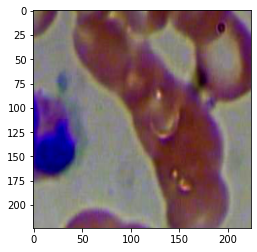

In [50]:
# get predictions
predictions = model.predict_classes(features_valid).ravel()
prediction_probabilities = model.predict(features_valid).ravel()

# extract validation images
_, valid_x, _, _ = train_test_split(X,y,test_size=0.3, random_state=42)

# get a random index
index = rng.choice(range(len(valid_x)))

# get the corresponding image
img = valid_x[index]

# get the corresponding probability
prob = (prediction_probabilities * 100).astype(int)[index]

# show image
plt.imshow(img)

# print probability
print('\n', prob , '% sure that it is WBC')


Text(320, 0, 'prob: 55%')

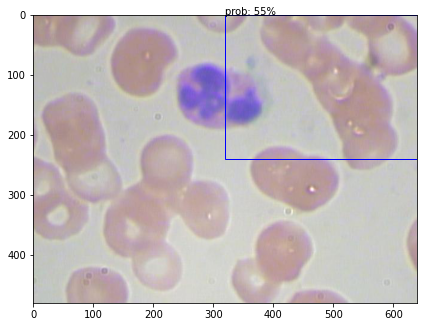

In [51]:
# extract index of patch
for i in range(X.shape[0]):
    if np.array_equal(X[i, :], img):
        break
        
# get the patch number
patch_num = (i % 5) + 1

# read the corresponding image
image = plt.imread('/content/imageProcessing/blood_cell_detection/images/' + data.iloc[int(i / 5)].filename)

# plot an empty figure and define axis
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# plot image
ax.imshow(image)

# get minimum and maximum co-ordinates
xmin = eval('patch_' + str(patch_num) + '_xmin')
xmax = eval('patch_' + str(patch_num) + '_xmax')
ymin = eval('patch_' + str(patch_num) + '_ymin')
ymax = eval('patch_' + str(patch_num) + '_ymax')

# get width and height
width = xmax - xmin
height = ymax - ymin

# define a rectangular patch
rect = patches.Rectangle((xmin, ymin), width, height, edgecolor='b', facecolor='none')

# annotate the patch
ax.annotate(xy=(xmin, ymin), s='prob: ' + str(prob) + "%")

# add the rectangular patch
ax.add_patch(rect)
    
# show figure
plt.show()

In [52]:
prediction_probabilities

array([0.21702269, 0.09780857, 0.9234663 , 0.26224518, 0.9579992 ,
       0.84372544, 0.42677167, 0.67469084, 0.53815717, 0.07211739,
       0.92934424, 0.19745532, 0.4667949 , 0.23600566, 0.18972412,
       0.24802256, 0.9784801 , 0.7920055 , 0.7229537 , 0.2450757 ,
       0.7193729 , 0.17253253, 0.09317532, 0.81645626, 0.9001274 ,
       0.26548588, 0.14787564, 0.21956095, 0.37309265, 0.5186865 ,
       0.39896882, 0.09996587, 0.6529932 , 0.8969091 , 0.60414046,
       0.7725705 , 0.8269304 , 0.1171757 , 0.6382558 , 0.24778709,
       0.935686  , 0.21476045, 0.8835553 , 0.85190225, 0.7532302 ,
       0.6983978 , 0.2637565 , 0.18292677, 0.06543812, 0.20879588,
       0.05555436, 0.30834565, 0.3944481 , 0.36134887, 0.8174849 ,
       0.21975505, 0.12372103, 0.16708633, 0.7018657 , 0.36966178,
       0.49741355, 0.94285387, 0.9699892 , 0.24149129, 0.20494539,
       0.7488684 , 0.783359  , 0.18570471, 0.7883243 , 0.20482424,
       0.34221745, 0.4732077 , 0.348449  , 0.19782156, 0.57023